# SAT Optics Simulation: Near-field

This notebook shows the optical path of the Simons Observatory SAT optics tube.  The ray-trace produces the electric field at the window (opening) of the SAT, which is in the near-field.  This field is convolved with a square to reproduce holography measurements, since the holography source emits its signal out of a rectangular feedhorn. 

Grace E. Chesmore
March 2022

<font size="2">Updated for Depreciation by Alex Thomas September 2023</font>

### Optical Path
We first ray-trace from the focal plane through the 3 lenses, and out to 300mm in front of the window.  The $\verb|tele_geo.y_source|$ variable changes the plane of the rays in front of the window, since this is where the holography source will eventually scan. 

The $\verb|ray_trace.rx_to_lyot|$ outputs the amplitude and pathlength $d_{\text{PL}}$ of the rays in front of the window.  The pathlength information can be converted to phase $\phi$ due to the relationship:
$$ \phi = d_{\text{PL}} \frac{\lambda}{2\pi}$$

c:\Users\alexg\anaconda3\lib\site-packages\sosat_optics\ot_geo.py:67: RuntimeWarning: invalid value encountered in sqrt
  amp = (c * r ** 2) / (1 + np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2)))
  0%|          | 0/3600 [00:00<?, ?it/s]c:\Users\alexg\anaconda3\lib\site-packages\sosat_optics\ot_geo.py:109: RuntimeWarning: invalid value encountered in sqrt
  coeff_2 = (c * 2) / (1 + np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2)))
c:\Users\alexg\anaconda3\lib\site-packages\sosat_optics\ot_geo.py:111: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2))
c:\Users\alexg\anaconda3\lib\site-packages\sosat_optics\ot_geo.py:112: RuntimeWarning: invalid value encountered in sqrt
  * (1 + np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2))) ** 2
c:\Users\alexg\anaconda3\lib\site-packages\sosat_optics\ray_trace.py:31: RuntimeWarning: invalid value encountered in sqrt
  s2 = (n1 / n2) * np.cross(N_surf, (np.cross(-N_surf, s1))) - N_surf * np.sqrt(
  2%|▏         | 72/3600 [00:00<00:

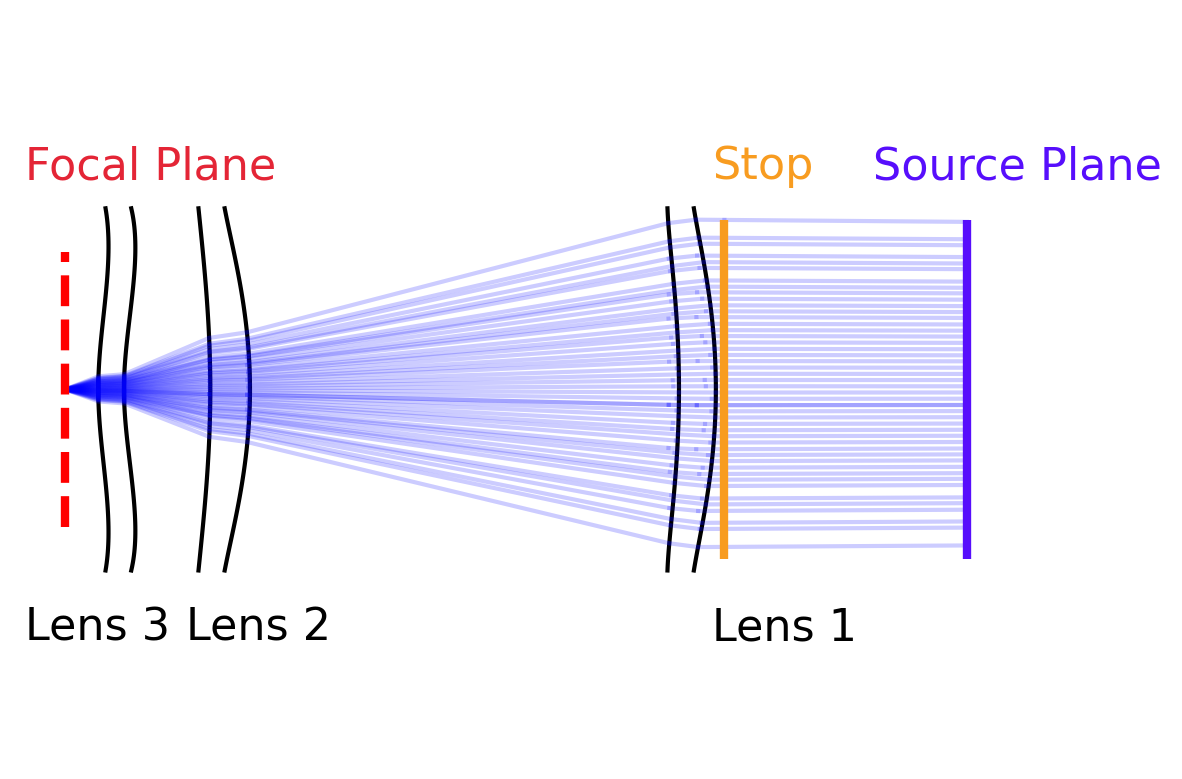

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sosat_optics
from sosat_optics import ot_geo, ray_trace, opt_analyze

matplotlib.rcParams["font.size"] = 16
matplotlib.rcParams.update(
    {
        "axes.grid": False,
        "grid.color": "grey",
        "grid.alpha": 0.2,
        "xtick.direction": "in",
        "ytick.direction": "in",
    }
)

red = '#e42536'
blue = '#570efc'
orange = '#f89c20'

# Load in telescope geometry
tele_geo = ot_geo.SatGeo() # Load in default geometry
tele_geo.n_scan = 60  # sample number in 1D of 2D ray tracing
tele_geo.y_source = (
    ot_geo.y_lyot + 300
)  # distance of holography source from SAT focal plane.
tele_geo.lambda_ = opt_analyze.ghz_to_m(106)  # wavelength of source, here we choose 106GHz.
tele_geo.k = 2 * np.pi / tele_geo.lambda_  # update kappa
fwhms = np.load('../feedhorn/fwhm_feedhorns.npy')
tele_geo.th_fwhp_x = np.deg2rad(fwhms[np.where(fwhms[:,0]==int(opt_analyze.m_to_ghz(tele_geo.lambda_))),1])
tele_geo.th_fwhp_y = np.deg2rad(fwhms[np.where(fwhms[:,0]==int(opt_analyze.m_to_ghz(tele_geo.lambda_))),2])
rx = [0,0,0]  # receiver feed position in focal plane [x,d_FPA,y]

sb = ray_trace.getNearField(tele_geo, rx,plot=True) # get near field

plt.vlines(x=ot_geo.y_lyot, ymin=-210, ymax=210, color=orange, linestyle="-",linewidth = 3) # plot Stop
plt.vlines(x=tele_geo.y_source, ymin=-210, ymax=210, color=blue, linestyle="-",linewidth = 3) # plot holography source plane
plt.vlines(x=0, ymin=-170, ymax=170, color="red", linestyle="--",linewidth = 3) # plot focal plane
plt.axis('off')
plt.axis("equal")
plt.annotate("Lens 3",xy = (-50,-310))
plt.annotate("Lens 2",xy = (150,-310))
plt.annotate("Lens 1",xy = (800,-310))
plt.annotate("Stop",xy = (800,260),color = orange)
plt.annotate("Source Plane",xy = (1000,260),color = blue)
plt.annotate("Focal Plane",xy = (-50,260),color = red)
plt.show()

## Holography Measurement

We will eventually measure these fields with holography.  A rectangular feedhorn emits the signal into the optics tube, convolving the measured beam, and therefor we need to account for this convolution in our simulation. 

A convolution of the fields shows the amplitude of the beam fall off quickly at ~10cm radius from center.  The phase also remains relatively constant in front of the window. 

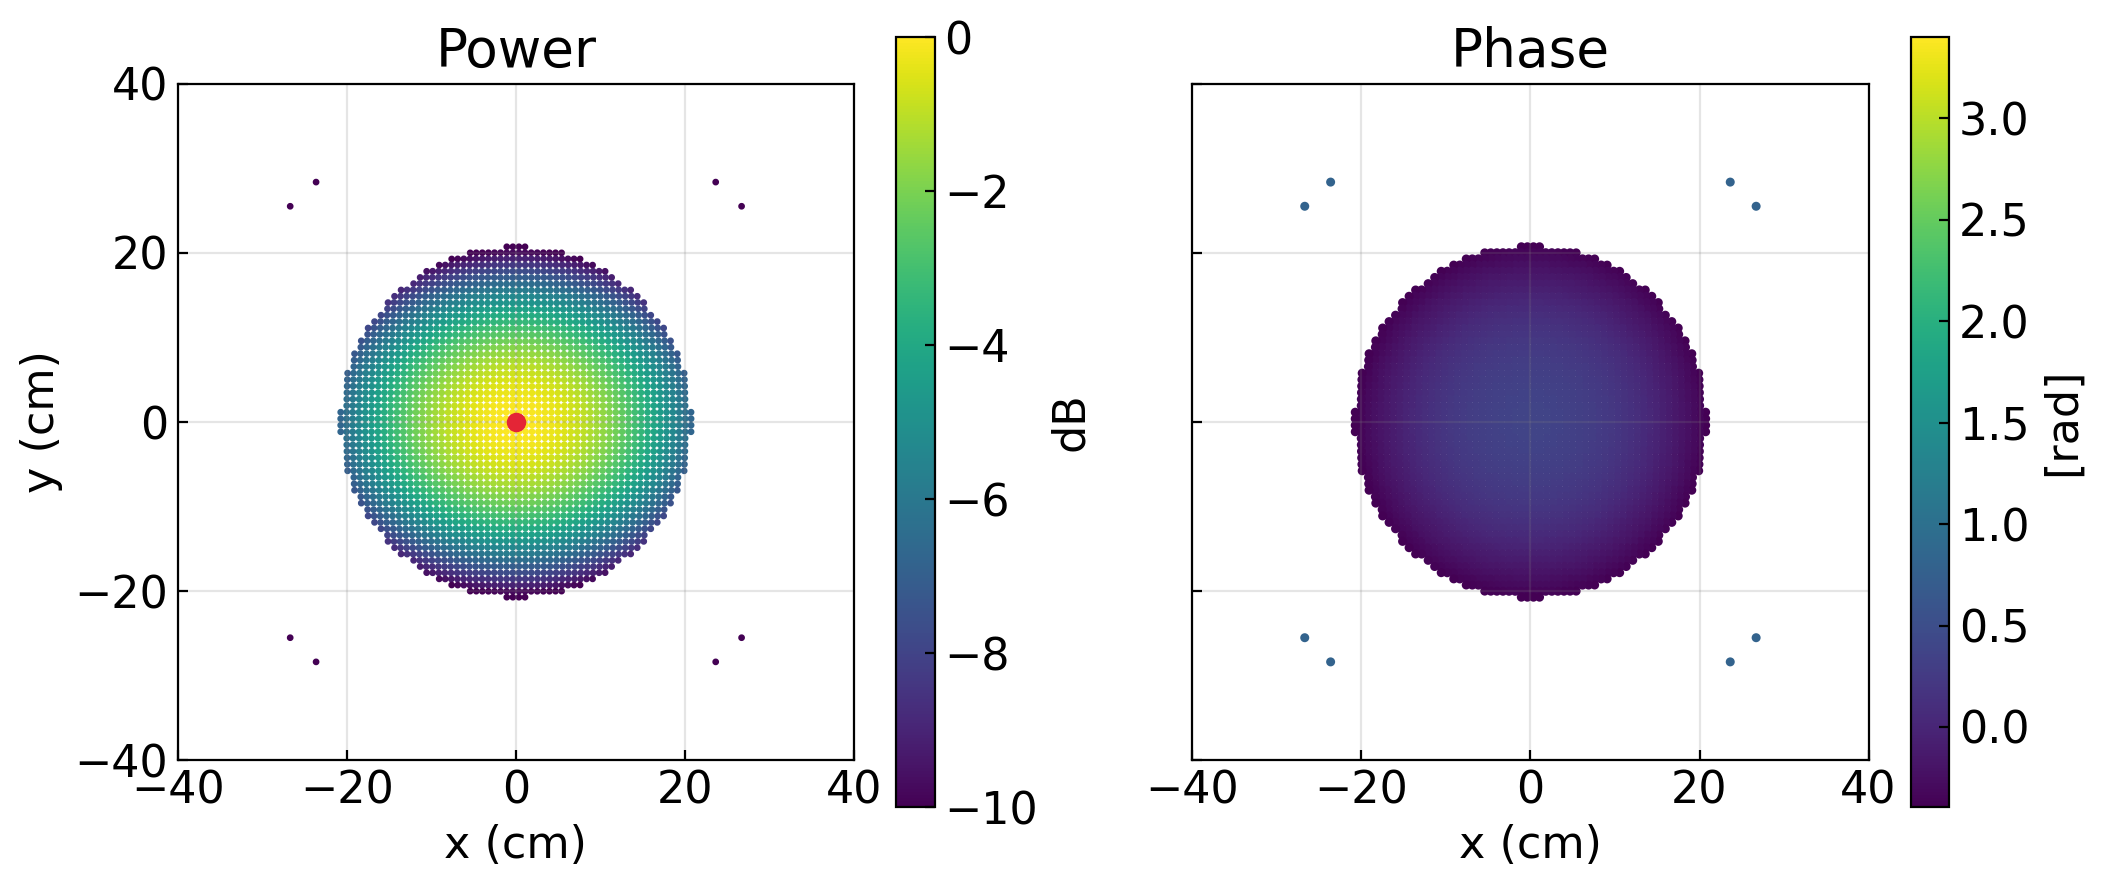

In [2]:
ray_trace.plotSimFields(sb, tele_geo) # plot near field

In [3]:
fwhms = ray_trace.get_fwhm(sb) # get fwhm of near field
b_cent = ray_trace.get_beam_cent(sb) # get beam center of near field
ang_out = ray_trace.get_angle_out(sb) # get angle of near field
print("FWHM in x: {:.2f} cm".format(fwhms[0]))
print("FWHM in y: {:.2f} cm".format(fwhms[1]))
print("Beam center: ({:.1f},{:.1f}) cm".format(b_cent[0],b_cent[1]))
print("Theta_x: {:.1f} degrees, Theta_y: {:.1f} degrees".format(ang_out[0],ang_out[1]))

FWHM in x: 11.06 cm
FWHM in y: 13.32 cm
Beam center: (-0.0,0.0) cm
Theta_x: 0.0 degrees, Theta_y: 0.0 degrees
